In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')

In [65]:
df.head(10)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
5,6,04/02/20,Kerala,3,0,0,0
6,7,05/02/20,Kerala,3,0,0,0
7,8,06/02/20,Kerala,3,0,0,0
8,9,07/02/20,Kerala,3,0,0,0
9,10,08/02/20,Kerala,3,0,0,0


In [66]:
dfnew = df.groupby('Date',sort=False)
dfnew.first()

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,,,
30/01/20,1,Kerala,1,0,0,0
31/01/20,2,Kerala,1,0,0,0
01/02/20,3,Kerala,2,0,0,0
02/02/20,4,Kerala,3,0,0,0
03/02/20,5,Kerala,3,0,0,0
04/02/20,6,Kerala,3,0,0,0
05/02/20,7,Kerala,3,0,0,0
06/02/20,8,Kerala,3,0,0,0
07/02/20,9,Kerala,3,0,0,0


In [67]:
dfa = df.drop(['State/UnionTerritory'],axis=1)

In [68]:
dfa['Total Deaths'] = df['Deaths']+df['ConfirmedForeignNational']+df['ConfirmedIndianNational']+df['Cured']
dfa.head()

,Sno,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Deaths
0,1,30/01/20,1,0,0,0,1
1,2,31/01/20,1,0,0,0,1
2,3,01/02/20,2,0,0,0,2
3,4,02/02/20,3,0,0,0,3
4,5,03/02/20,3,0,0,0,3


In [69]:
dfx = dfa.groupby(['Date'])['Total Deaths']
dfx.get_group('04/03/20').sum()

31

In [70]:
x,y=[],[]
for i in df['Date'].unique():
  y.append(dfx.get_group(i).sum())
  x.append(i)


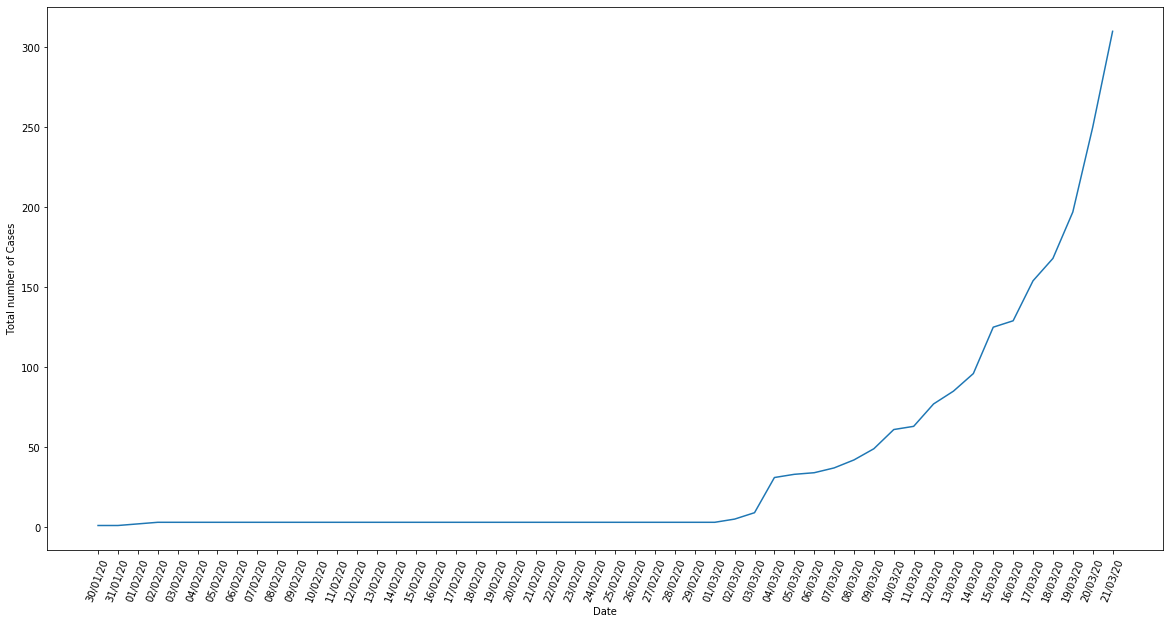

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.xticks(rotation=69)
plt.xlabel('Date')
plt.ylabel('Total number of Cases')
plt.show()

In [82]:
rate = []
for i in range(len(x)-1):
    rate.append((y[i+1]-y[i])/y[i])
for i in range(len(rate)):
    print(f'({x[i]} : {rate[i]})')

(30/01/20 : 0.0)
(31/01/20 : 1.0)
(01/02/20 : 0.5)
(02/02/20 : 0.0)
(03/02/20 : 0.0)
(04/02/20 : 0.0)
(05/02/20 : 0.0)
(06/02/20 : 0.0)
(07/02/20 : 0.0)
(08/02/20 : 0.0)
(09/02/20 : 0.0)
(10/02/20 : 0.0)
(11/02/20 : 0.0)
(12/02/20 : 0.0)
(13/02/20 : 0.0)
(14/02/20 : 0.0)
(15/02/20 : 0.0)
(16/02/20 : 0.0)
(17/02/20 : 0.0)
(18/02/20 : 0.0)
(19/02/20 : 0.0)
(20/02/20 : 0.0)
(21/02/20 : 0.0)
(22/02/20 : 0.0)
(23/02/20 : 0.0)
(24/02/20 : 0.0)
(25/02/20 : 0.0)
(26/02/20 : 0.0)
(27/02/20 : 0.0)
(28/02/20 : 0.0)
(29/02/20 : 0.0)
(01/03/20 : 0.6666666666666666)
(02/03/20 : 0.8)
(03/03/20 : 2.4444444444444446)
(04/03/20 : 0.06451612903225806)
(05/03/20 : 0.030303030303030304)
(06/03/20 : 0.08823529411764706)
(07/03/20 : 0.13513513513513514)
(08/03/20 : 0.16666666666666666)
(09/03/20 : 0.24489795918367346)
(10/03/20 : 0.03278688524590164)
(11/03/20 : 0.2222222222222222)
(12/03/20 : 0.1038961038961039)
(13/03/20 : 0.12941176470588237)
(14/03/20 : 0.3020833333333333)
(15/03/20 : 0.032)
(16/03/20 : 

In [83]:
#Given P_o=31 and t=26 and by above formula we got r=0.06451612903225806
import math
print(31*math.exp(0.06451612903225806*26))

165.90354401479883
